# Assignment 3(due on 11/22)

## Student:黄丕柱（12332298），Gtihub：HuangPizhu
## 批改人：吴昊天


## 得分：63/60

# ESE5023 Assignment 03 
--- 
***HUANG Pizhu***   
12332298

Import relevant packages

In [3]:
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from pathlib import Path
import calendar
%matplotlib inline

## 1.Niño 3.4 index

In [4]:
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

### 1.1  
The region of Niño 3.4 is 5N-5S, 170W-120W. West longitude in SST dataset is from 190 to 242.
Firstly, calculate averages SST of Niño 3.4 Region.  
The variable sst_anom is anomalies while `group_data.mean(dim='time')` is climatology.

In [5]:
group_data = ds.sst.groupby('time.month')
sst_anom = group_data - group_data.mean(dim='time')
ano=sst_anom.sel(lat=np.arange(-4,6,2)).sel(lon=np.arange(190,242,2)).mean(dim=['lat','lon'])

Simply plot the monthly anomaly for SST from Niño 3.4 region

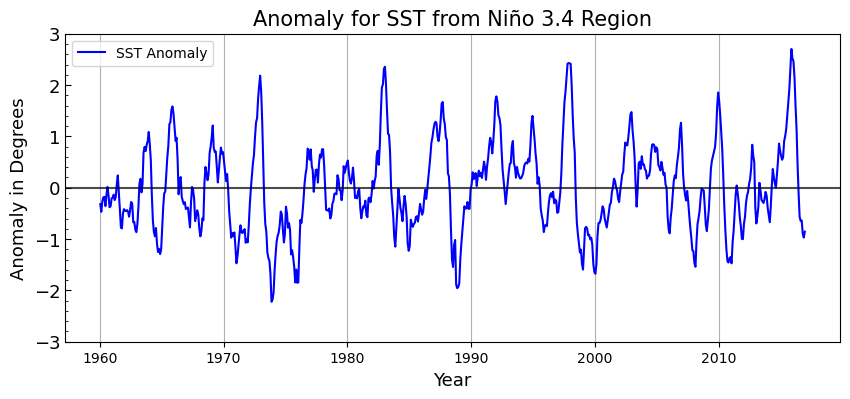

In [6]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(ano['time'],ano,color='b',label='SST Anomaly')
ax.grid(axis='x')
ax.tick_params(axis='y', labelsize=13, direction='in',length=4)
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.tick_params(axis="y", direction="in", which="minor", length=2)
ax.set_ylim(-3,3)
ax.set_yticks(np.arange(-3,3.2,1))
ax.axhline(y=0, color='k', linestyle='-',alpha=0.7)
ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('Anomaly in Degrees',fontsize=13)
ax.set_title('Anomaly for SST from Niño 3.4 Region',fontsize=15)
plt.legend()

plt.show()

### 1.2  
**3 months rolling computes the Niño 3.4 index. The plot has bar composed with anomalies and the black line represented ONI, Oceanic Niño Index.**

In [7]:
ds_anom_rolling = sst_anom.rolling(time=3, center=True).mean()
g = ds_anom_rolling.sel(lat=np.arange(-4,6,2)).sel(lon=np.arange(190,242,2)).mean(dim=['lat','lon'])
y = ano.to_dataframe()
y1 = g.to_dataframe()

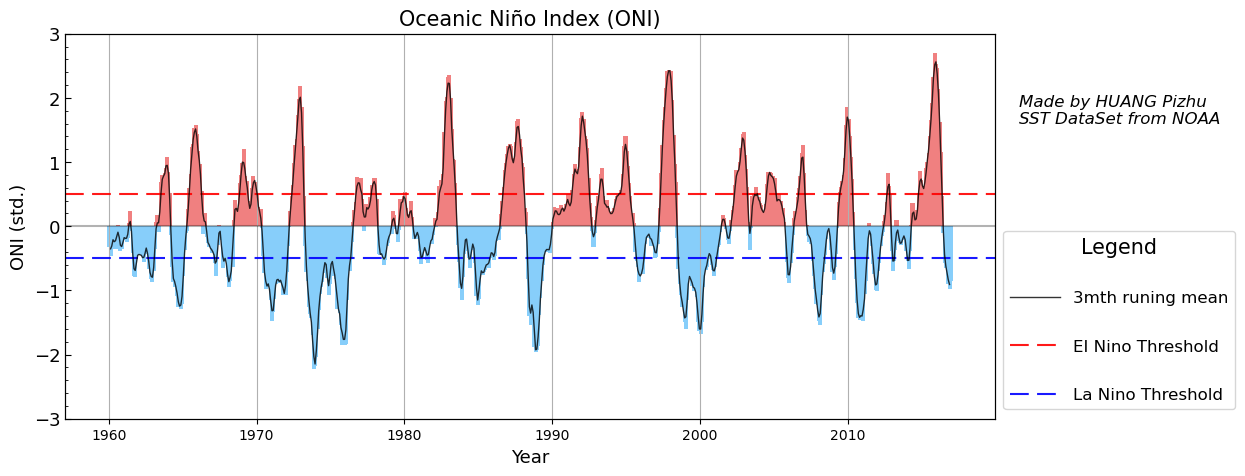

In [8]:
fig, ax = plt.subplots(figsize=(12,5))

colors = ['lightcoral' if value >= 0 else 'lightskyblue' for value in y['sst']]
ax.bar(y.index, y['sst'], width=100, color=colors)
ax.grid(axis='x')
ax.tick_params(axis='y', labelsize=13, direction='in',length=4)
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.tick_params(axis="y", direction="in", which="minor", length=2)
ax.set_ylim(-3,3)
ax.set_yticks(np.arange(-3,3.2,1))

ax.set_xlabel('Year',fontsize=13)
ax.set_ylabel('ONI (std.)',fontsize=13)
ax.set_title('Oceanic Niño Index (ONI)',fontsize=15)

ax.axhline(y=0, color='k', linestyle='-',alpha=0.3)

ax.axhline(y=0.5, color='r', linestyle=(0,(9,4)),alpha=0.9,label='EI Nino Threshold')
ax.axhline(y=-0.5, color='b', linestyle=(0,(9,4)),alpha=0.9,label='La Nino Threshold')

Text = 'Made by HUANG Pizhu\nSST DataSet from NOAA'
ax.text(0.92, 0.7, Text, transform=plt.gcf().transFigure, 
         fontsize=12, fontstyle='italic',ha='left', color='k')

ax2 = ax.twinx()
ax2.plot(y1.index, y1['sst'],color='k',label='3mth runing mean',alpha=0.8,linewidth=1)
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks([])

lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax.get_legend_handles_labels()
legend = ax2.legend(lines + lines2, labels + labels2, title='Legend',
                    handlelength=3, bbox_to_anchor=(1, 0.51), loc=2, borderaxespad=0.5,fontsize=12,labelspacing=2)
legend.set_title("Legend", prop={"size": 15})
plt.show()


From the above plot, we can find about 11 EI events and 8 La events.

### 1.1 从海温时间序列中减去气候学得到异常。
### 1.2 绘制了相近的图像。
### 得分：21/20

### =============================

## 2.Earth’s energy budget

Read the Earth's energy dataset and check variables. 

In [9]:
ds = xr.open_dataset("CERES_EBAF-TOA_200003-201701.nc", engine="netcdf4")
lon = ds.lon
lat = ds.lat

Check variables with printing their long name.

In [10]:
print(ds.toa_lw_all_mon.long_name)
print(ds.toa_sw_all_mon.long_name)
print(ds.toa_net_all_mon.long_name)
print(ds.solar_mon.long_name)

Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
Incoming Solar Flux, Monthly Means


### 2.1  
2D plot of the time-mean TOA longwave, shortwave, and solar radiation for all-sky conditions. 

**Addition TOA net flux = solar radiation - TOA longwave - TOA shortwave.**   
Compare the data of the TOA net flux with the addition TOA net flux.  

In [11]:
#toa_lw_all_mon  toa_sw_all_mon  solar_mon toa_net_all_mon
toa_lw_all_mon = ds.toa_lw_all_mon.mean(dim='time')
toa_sw_all_mon = ds.toa_sw_all_mon.mean(dim='time')
solar_mon = ds.solar_mon.mean(dim='time')
toa_net_all_mon = ds.toa_net_all_mon.mean(dim='time')

C:\Users\Wu\AppData\Local\Temp\ipykernel_28988\4293560795.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


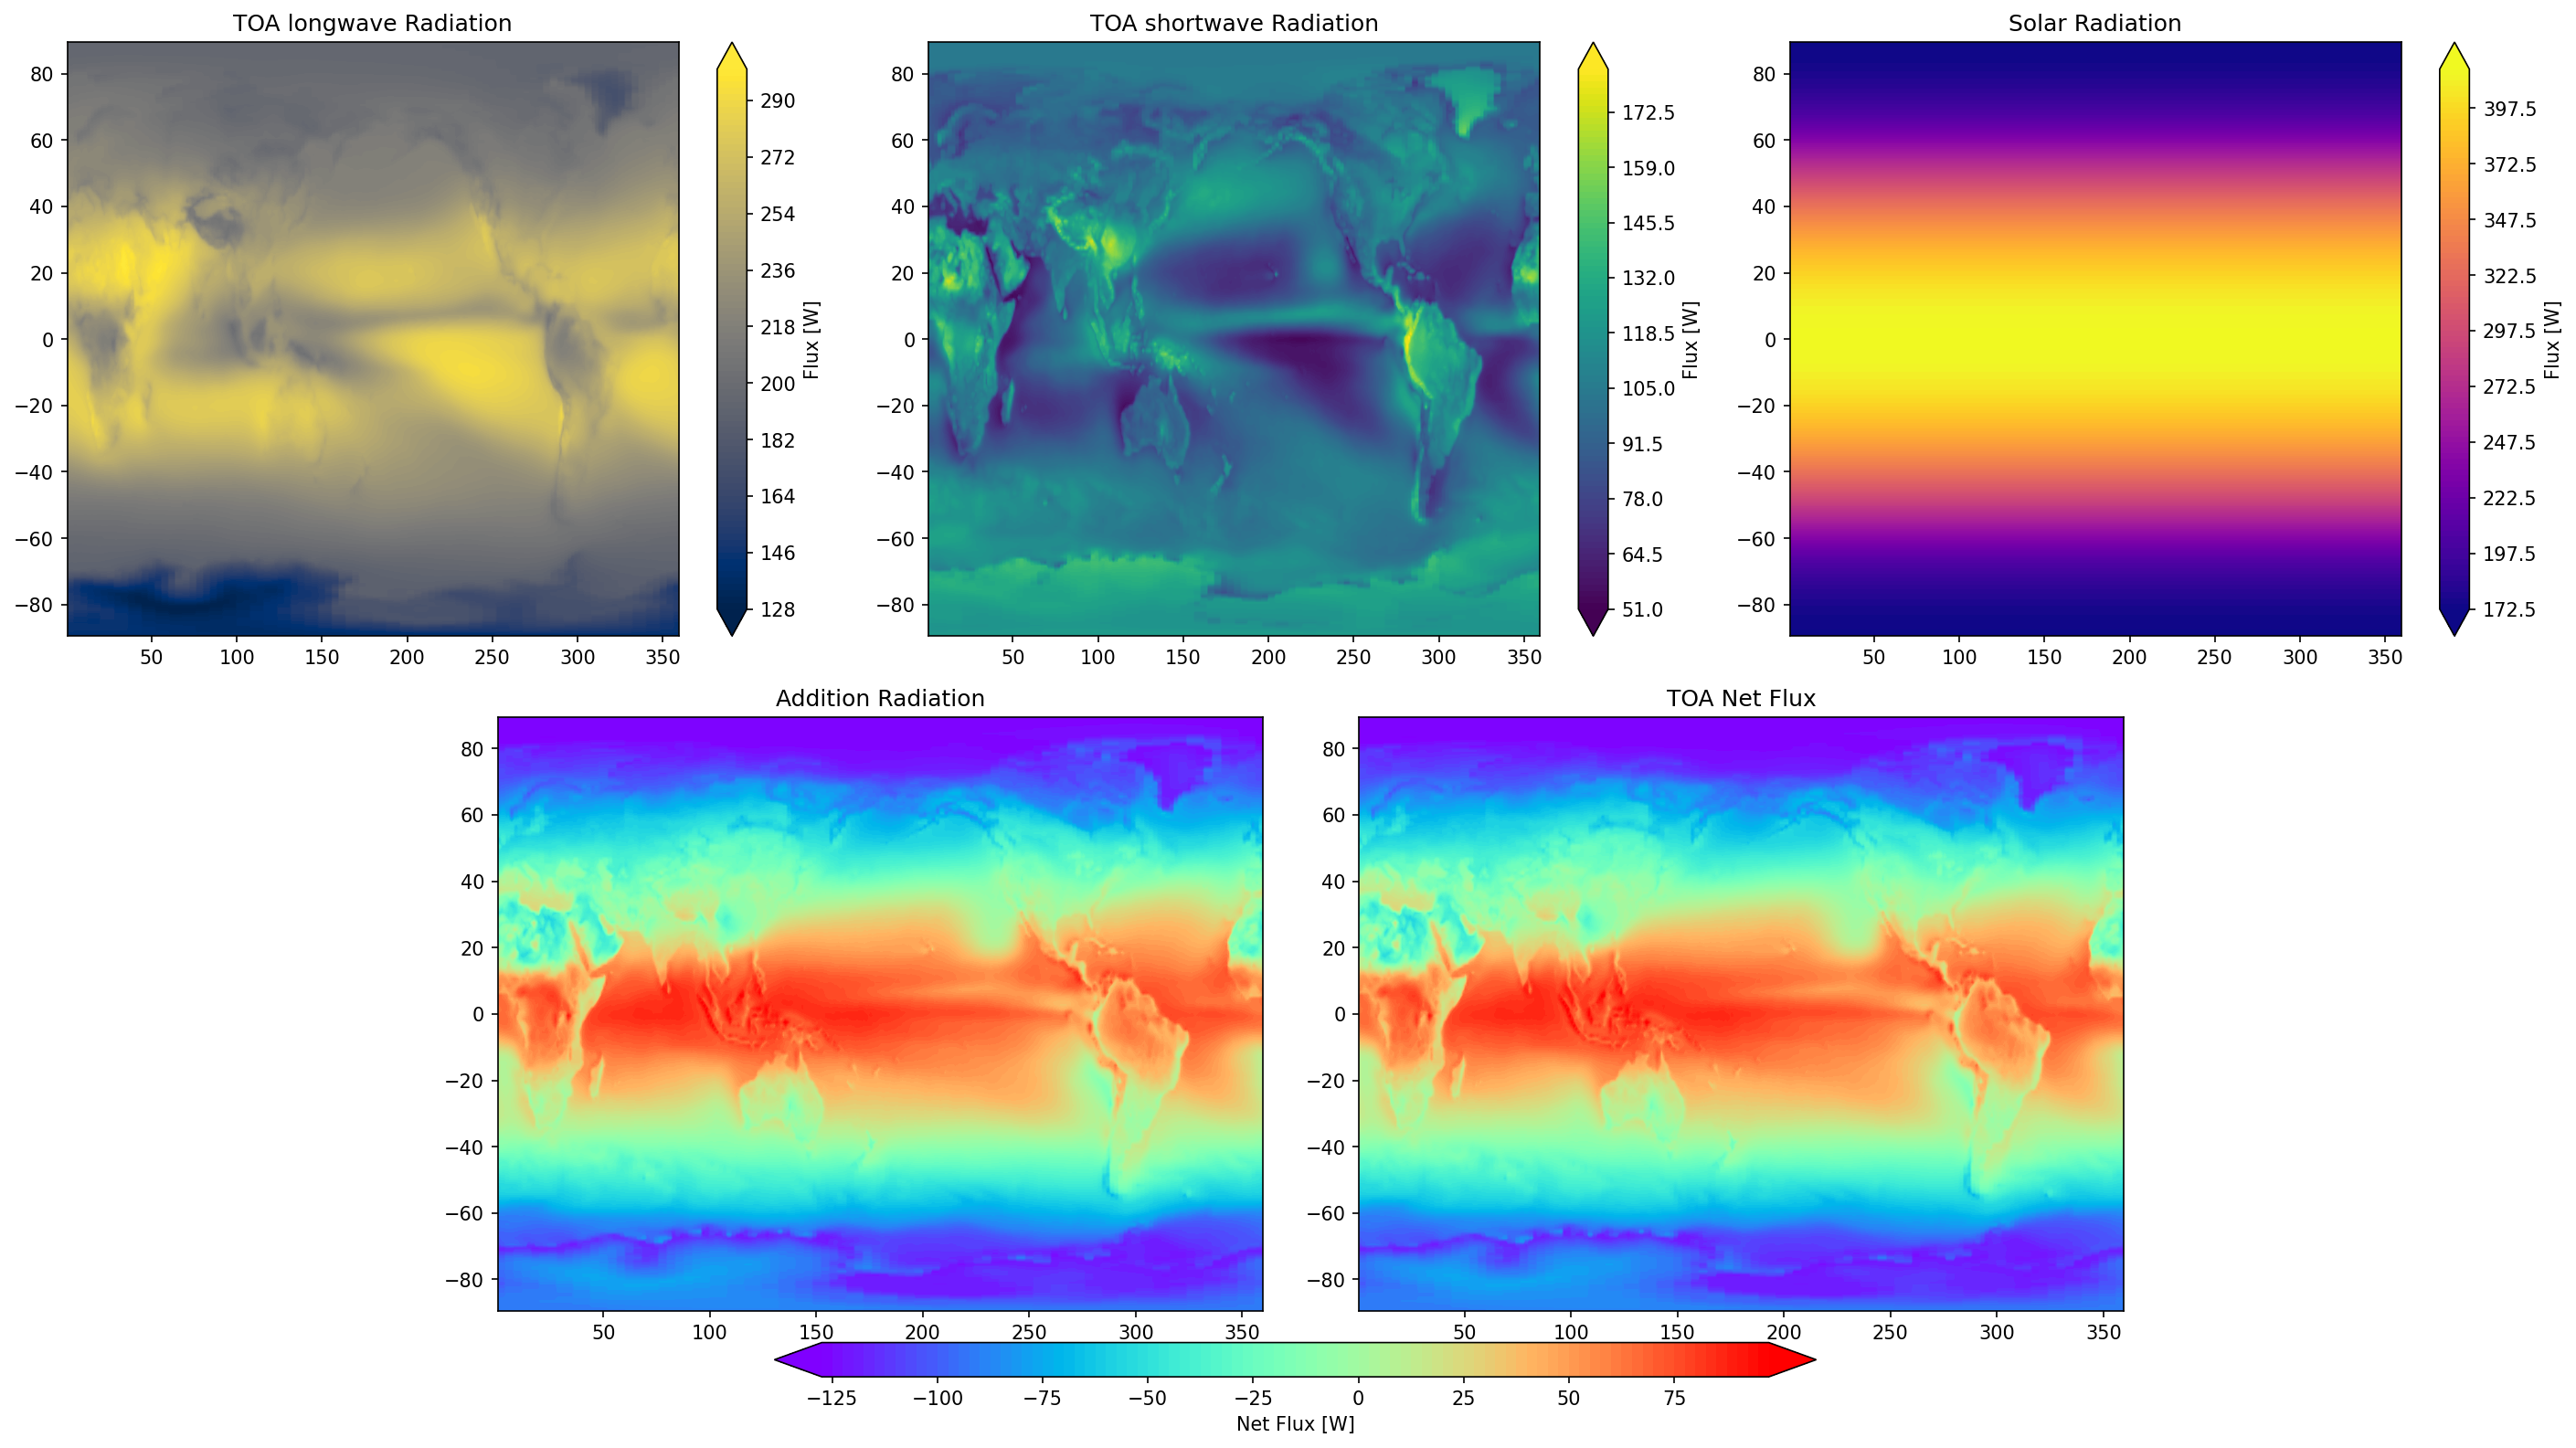

In [12]:
fig = plt.figure(figsize=(19, 10), dpi=150)
grid = (2, 6)

ax1 = plt.subplot2grid(grid, (0, 0), colspan=2)
ax2 = plt.subplot2grid(grid, (0, 2), colspan=2) 
ax3 = plt.subplot2grid(grid, (0, 4), colspan=2)  
ax4 = plt.subplot2grid(grid, (1, 1), colspan=2)  
ax5 = plt.subplot2grid(grid, (1, 3), colspan=2)  

im1 = ax1.contourf(lon, lat, toa_lw_all_mon, cmap='cividis',levels=100,extend = 'both')
ax1.set_title("TOA longwave Radiation")
fig.colorbar(im1, ax=ax1).set_label('Flux [W]')

im2 = ax2.contourf(lon, lat, toa_sw_all_mon, cmap='viridis',levels=100,extend = 'both')
ax2.set_title("TOA shortwave Radiation")
fig.colorbar(im2, ax=ax2).set_label('Flux [W]')

im3 = ax3.contourf(lon, lat, solar_mon, cmap='plasma',levels=100,extend = 'both')
ax3.set_title("Solar Radiation")
fig.colorbar(im3, ax=ax3).set_label('Flux [W]')

im4 = ax4.contourf(lon, lat, solar_mon - toa_sw_all_mon - toa_lw_all_mon, cmap='rainbow',levels=100,extend = 'both')
ax4.set_title("Addition Radiation")

im5 = ax5.contourf(lon, lat, toa_net_all_mon, cmap='rainbow',levels=100,extend = 'both')
ax5.set_title("TOA Net Flux")

# Create an additional subplot for the colorbar
cax = fig.add_axes([0.3, -0.01, 0.4, 0.025])  # position of the colorbar
fig.colorbar(im5,cax=cax, orientation='horizontal',extend='both').set_label('Net Flux [W]')

plt.tight_layout()

plt.show()

**Verify visually that addition is equivalent to the TOA net flux.**  

### 2.2

`weights = np.cos(np.deg2rad(ds.lat))` is weight of area in different latitude.  
The unit of the given data is [W/m²] representing flux per unit area.

In [13]:
weights = np.cos(np.deg2rad(ds.lat))
#weights.dims

toa_lw_all_mon_gr = ds.toa_lw_all_mon.weighted(weights).mean(dim=['time','lon','lat'])
toa_sw_all_mon_gr = ds.toa_sw_all_mon.weighted(weights).mean(dim=['time','lon','lat'])
solar_mon_gr = ds.solar_mon.weighted(weights).mean(dim=['time','lon','lat'])

print("outgoing longwave:",toa_lw_all_mon_gr.values,'W·m^-2')
print("outgoing shortwave:",toa_sw_all_mon_gr.values,'W·m^-2')
print("TOA incoming solar:",solar_mon_gr.values,'W·m^-2')

outgoing longwave: 240.26691846331997 W·m^-2
outgoing shortwave: 99.13806041149408 W·m^-2
TOA incoming solar: 340.28326598091286 W·m^-2


All values are average values based on seventeen years of data, which are  
outgoing longwave: 240.26692 W·m^-2  
outgoing shortwave: 99.13806 W·m^-2  
TOA incoming solar: 340.28326 W·m^-2  
**Verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with the given cartoon.**

### 2.3  
I discussed the problem of the total amount with many classmates, including HU Beihui and YU Zhe. Finally, under the hint of CHEN Zhekun, it was found that the area of 1° latitude of the equator is about 111,000 meters square.  
`weights = np.cos(np.deg2rad(ds.lat))` is the weight of area, which means the area of a grid of one degree latitude and one degree longitude is 111000^2*weight.  
Calculation of the total amount of net radiation in each 1-degree latitude band uesd `ds.toa_net_all_mon.mean(dim='lon')`,  and plot it by `dataset.plot.contourf`.

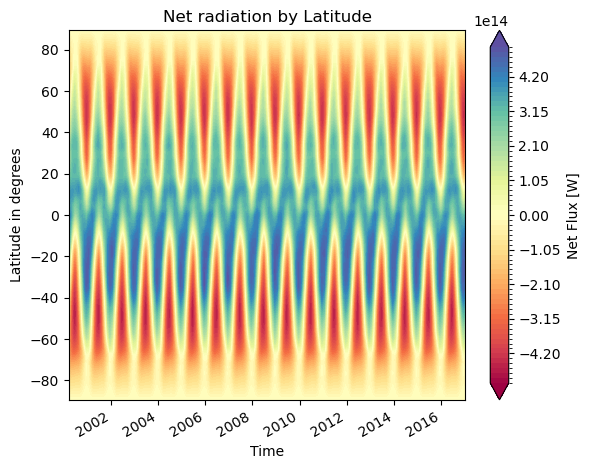

In [14]:
p = ds.toa_net_all_mon.weighted(weights).sum(dim='lon') * 111000**2
p.plot.contourf(x='time', levels=100, cmap='Spectral',extend = 'both').colorbar.set_label('Net Flux [W]')
plt.ylabel('Latitude in degrees')
plt.xlabel('Time')
plt.title('Net radiation by Latitude')
plt.show()

This 1Dplot are the average based on seventeen years of data of flux.

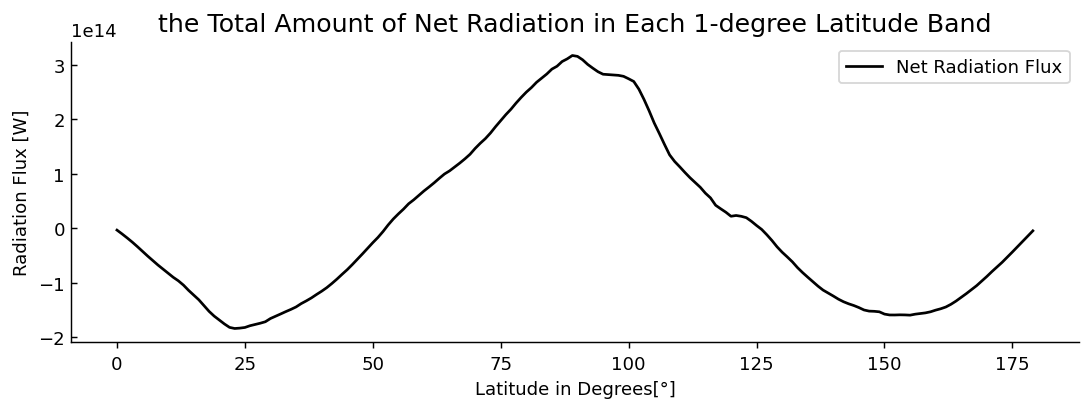

In [15]:
pt = ds.toa_net_all_mon.weighted(weights).sum(dim='lon').mean(dim='time') * 111000**2

fig, ax= plt.subplots(figsize=(10,3),dpi=130)
ax.plot(pt,label='Net Radiation Flux',linestyle='-',color='k')
ax.set_xlabel('Latitude in Degrees[°]')
ax.set_ylabel('Radiation Flux [W]')
ax.set_title('the Total Amount of Net Radiation in Each 1-degree Latitude Band',fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', direction='in')
ax.legend(loc='best')
plt.show()

### 2.4  
Calculate and plot composites of time-mean outgoing shortwave and longwave radiation for low and high cloud area regions.  
*Definitions for low cloud area as ≤25% and high cloud area as ≥75%.*

In [16]:
lon = ds.lon
lat = ds.lat
#outgoing shortwave and longwave radiation for low and high cloud area regions
#low cloud area as ≤25% and high cloud area as ≥75%
low = ds.cldarea_total_daynight_mon.mean(dim='time') <= 25
high = ds.cldarea_total_daynight_mon.mean(dim='time')  >= 75
sw_low = ds.toa_sw_all_mon.where(low).mean(dim='time')
sw_high = ds.toa_sw_all_mon.where(high).mean(dim='time')
lw_low = ds.toa_lw_all_mon.where(low).mean(dim='time')
lw_high = ds.toa_lw_all_mon.where(high).mean(dim='time')

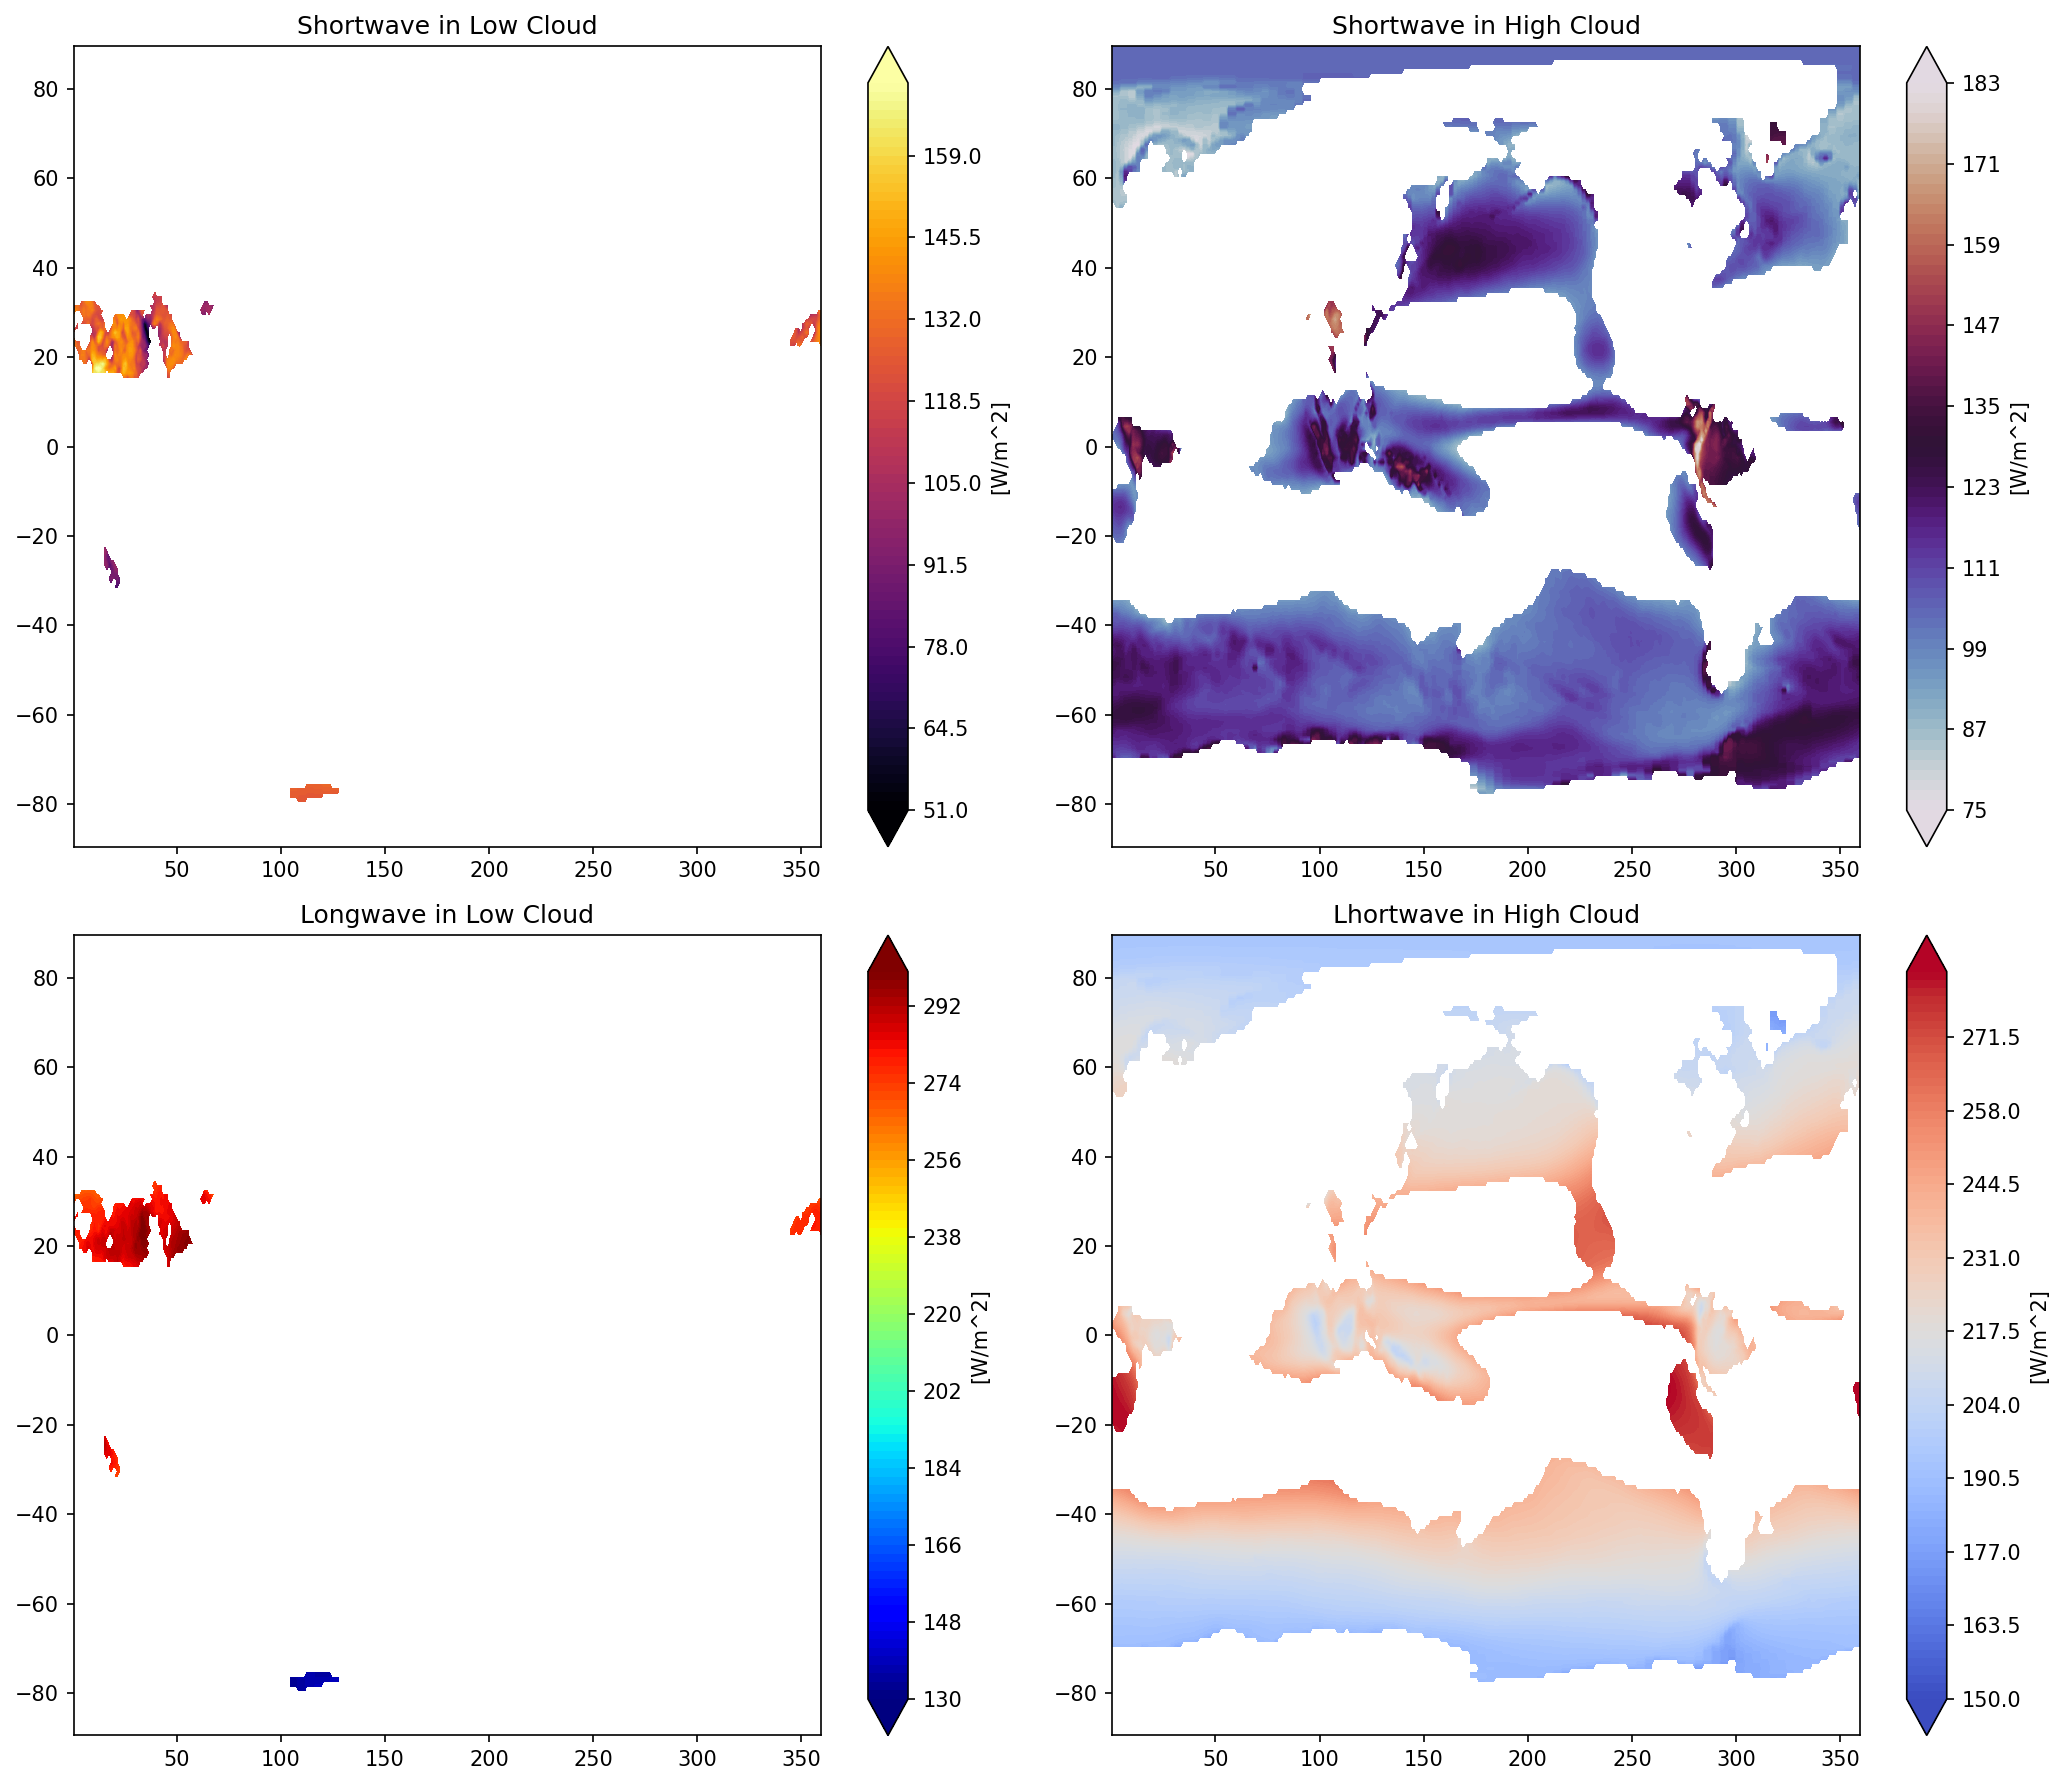

In [17]:
fig = plt.figure(figsize=(14, 12), dpi=150)
grid = (2, 2)

ax1 = plt.subplot2grid(grid, (0, 0))  # topleft
ax2 = plt.subplot2grid(grid, (0, 1))  # right
ax3 = plt.subplot2grid(grid, (1, 0))  # bottom left
ax4 = plt.subplot2grid(grid, (1, 1))  # bottom right


im1 = ax1.contourf(lon, lat, sw_low,levels=100, cmap='inferno',extend = 'both')
ax1.set_title("Shortwave in Low Cloud")
cbar = plt.colorbar(im1, ax=ax1)
cbar.set_label('[W/m^2]')

im2 = ax2.contourf(lon, lat, sw_high, levels=100,cmap='twilight',extend = 'both')
ax2.set_title("Shortwave in High Cloud")
cbar = plt.colorbar(im2, ax=ax2)
cbar.set_label('[W/m^2]')

im3 = ax3.contourf(lon, lat, lw_low, levels=100,cmap='jet',extend = 'both')
ax3.set_title("Longwave in Low Cloud")
cbar = plt.colorbar(im3, ax=ax3)
cbar.set_label('[W/m^2]')

im4 = ax4.contourf(lon, lat, lw_high, levels=100,cmap='coolwarm',extend = 'both')
ax4.set_title("Lhortwave in High Cloud")
cbar = plt.colorbar(im4, ax=ax4)
cbar.set_label('[W/m^2]')

plt.tight_layout()
plt.show()

### 2.5  
Calculate the global mean values of shortwave and longwave radiation, composited in high and low cloud regions. Plot it as time serise.  

**Weights are required when averaging latitudes.**

In [18]:
weights = np.cos(np.deg2rad(ds.lat))

sw_low_gm = ds.toa_sw_all_mon.where(low).weighted(weights).mean(dim=['lon','lat'])
sw_high_gm = ds.toa_sw_all_mon.where(high).weighted(weights).mean(dim=['lon','lat'])
lw_low_gm = ds.toa_lw_all_mon.where(low).weighted(weights).mean(dim=['lon','lat'])
lw_high_gm = ds.toa_lw_all_mon.where(high).weighted(weights).mean(dim=['lon','lat'])

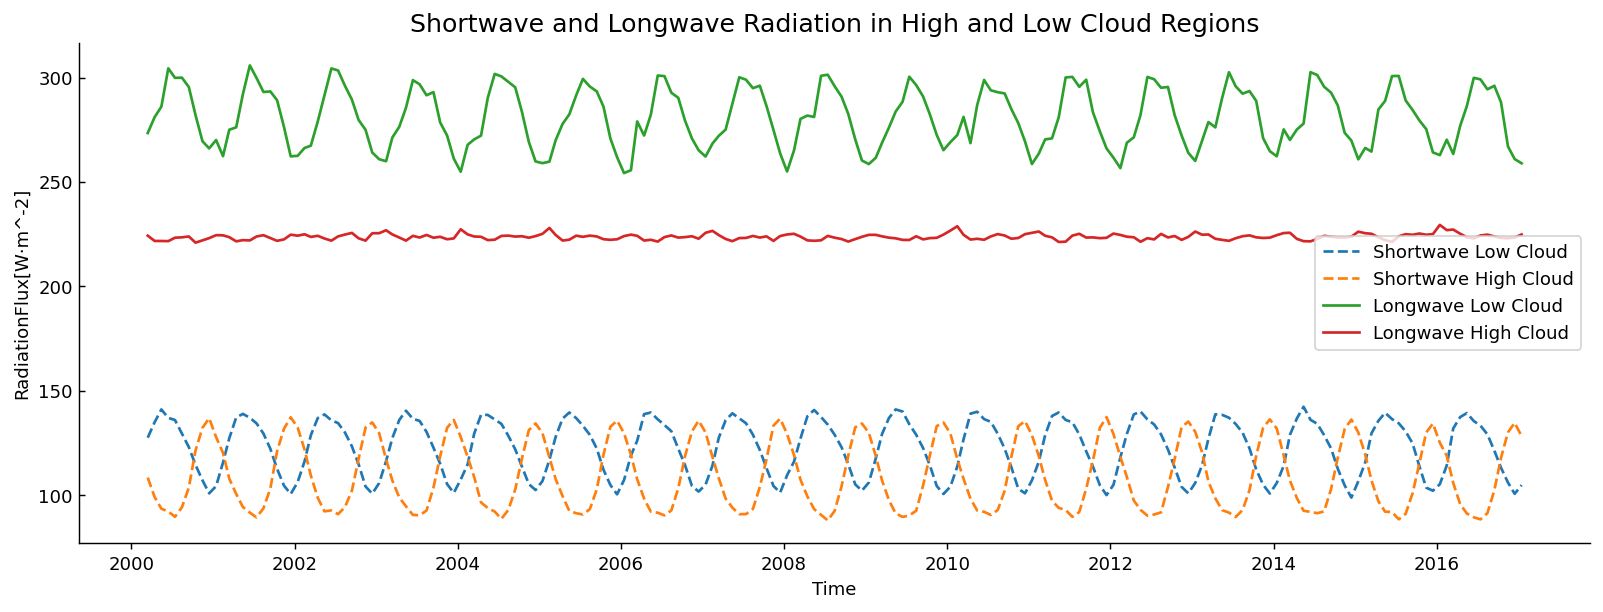

In [19]:
time = lw_high_gm.time
fig, ax= plt.subplots(figsize=(15,5),dpi=130)
ax.plot(time,sw_low_gm,label='Shortwave Low Cloud',linestyle='--')
ax.plot(time,sw_high_gm,label='Shortwave High Cloud',linestyle='--')
ax.plot(time,lw_low_gm,label='Longwave Low Cloud')
ax.plot(time,lw_high_gm,label='Longwave High Cloud')
ax.set_xlabel('Time')
ax.set_ylabel('RadiationFlux[W·m^-2]')
ax.set_title('Shortwave and Longwave Radiation in High and Low Cloud Regions',fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', direction='in')
ax.legend(loc='best')
plt.show()

In [20]:
sw_low_gm_t = ds.toa_sw_all_mon.where(low).weighted(weights).mean(dim=['lon','lat','time'])
sw_high_gm_t = ds.toa_sw_all_mon.where(high).weighted(weights).mean(dim=['lon','lat','time'])
lw_low_gm_t = ds.toa_lw_all_mon.where(low).weighted(weights).mean(dim=['lon','lat','time'])
lw_high_gm_t = ds.toa_lw_all_mon.where(high).weighted(weights).mean(dim=['lon','lat','time'])
print('Shortwave in Low Cloud:',sw_low_gm_t.values,'W·m^-2\n',
      'Shortwave in High Cloud:',sw_high_gm_t.values,'W·m^-2\n',
      'Longwave in low Cloud:',lw_low_gm_t.values,'W·m^-2\n',
      'longwave in High Cloud:',lw_high_gm_t.values,'W·m^-2')

Shortwave in Low Cloud: 122.55190380794662 W·m^-2
 Shortwave in High Cloud: 109.2060487271777 W·m^-2
 Longwave in low Cloud: 280.6621264872918 W·m^-2
 longwave in High Cloud: 223.76609250700548 W·m^-2


What is the overall effect of clouds on shortwave and longwave radiation?  
  
**Answer**:For long waves, clouds reduce the amount of long waves radiating outward.For short wave, the influence of high cloud and low cloud is opposite, the high cloud region radiates more short wave, while the low cloud region radiates less short wave. In spring and winter, there are more short wave radiation in low cloud area, but less short wave in high cloud area.On average, low cloud areas still have slightly more short waves than high cloud areas.


### 2.1 从绘制图像正确，验证了辐射平衡。
### 2.2 计算正确，能量守恒。
### 2.3 图像绘制正确。
### 2.4 图像绘制正确。
### 2.5 计算正确。进行了分析
### 得分：31/30

### =============================

# 3.Explore a netCDF dataset

I download a dataset using keywords that are temperature, land and sea in the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website.  
Reset timeserise in 2000 to 2020, and get the download-links, finall load amount nc4 files via edge extension, DownThemAll.  
Use `xr.open_mfdataset()` to read nc4 data in batches after replacing the illegal characters in the file name.

In [21]:
filepath = Path('D:\workdirectory\Assignment\PS3\data')
filelist = list(filepath.glob('*.nc4'))

In [22]:
filepath = 'D:\workdirectory\Assignment\PS3\data'
filelist = list(Path(filepath).glob('*.nc4'))
ds = xr.open_mfdataset(filelist)

OSError: no files to open

### 3.1

ds.Qsb_acc represents the baseflow-groundwater runoff.  
**Plot a time series of certain variable,ds.Qsb_acc, with monthly seasonal cycle removed.**

In [ ]:
dq_gro = ds.Qsb_acc.groupby('time.month')
dq_average = dq_gro - dq_gro.mean(dim='time')
dq_reav = dq_average.mean(dim=['lat','lon'])

d:\Program\Anaconda\envs\Env\Lib\site-packages\xarray\core\indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 21 times more chunks
  return self.array[key]


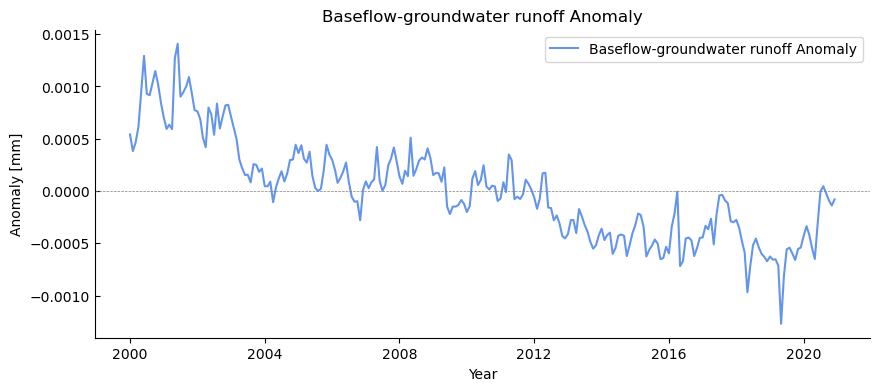

In [ ]:
g = dq_reav.copy()
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(g['time'],g,color='cornflowerblue',label='Baseflow-groundwater runoff Anomaly')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('Anomaly [mm]')
ax.set_title('Baseflow-groundwater runoff Anomaly')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', direction='in')
plt.legend()
plt.show()

### 3.2  
Make at least 5 different plots using the dataset.

**Plot 1** Ridge map of Baseflow-groundwater runoff  
Access the Python Graph Gallery website at https://python-graph-gallery.com/ to gather information.

In [ ]:
y = ds.Qsb_acc.mean(dim=['lon','lat']).to_dataframe()
y['month'] = y['month'] = y.index.month

Text(0.5, 0.98, 'KDE Monthly Baseflow-groundwater runoff')

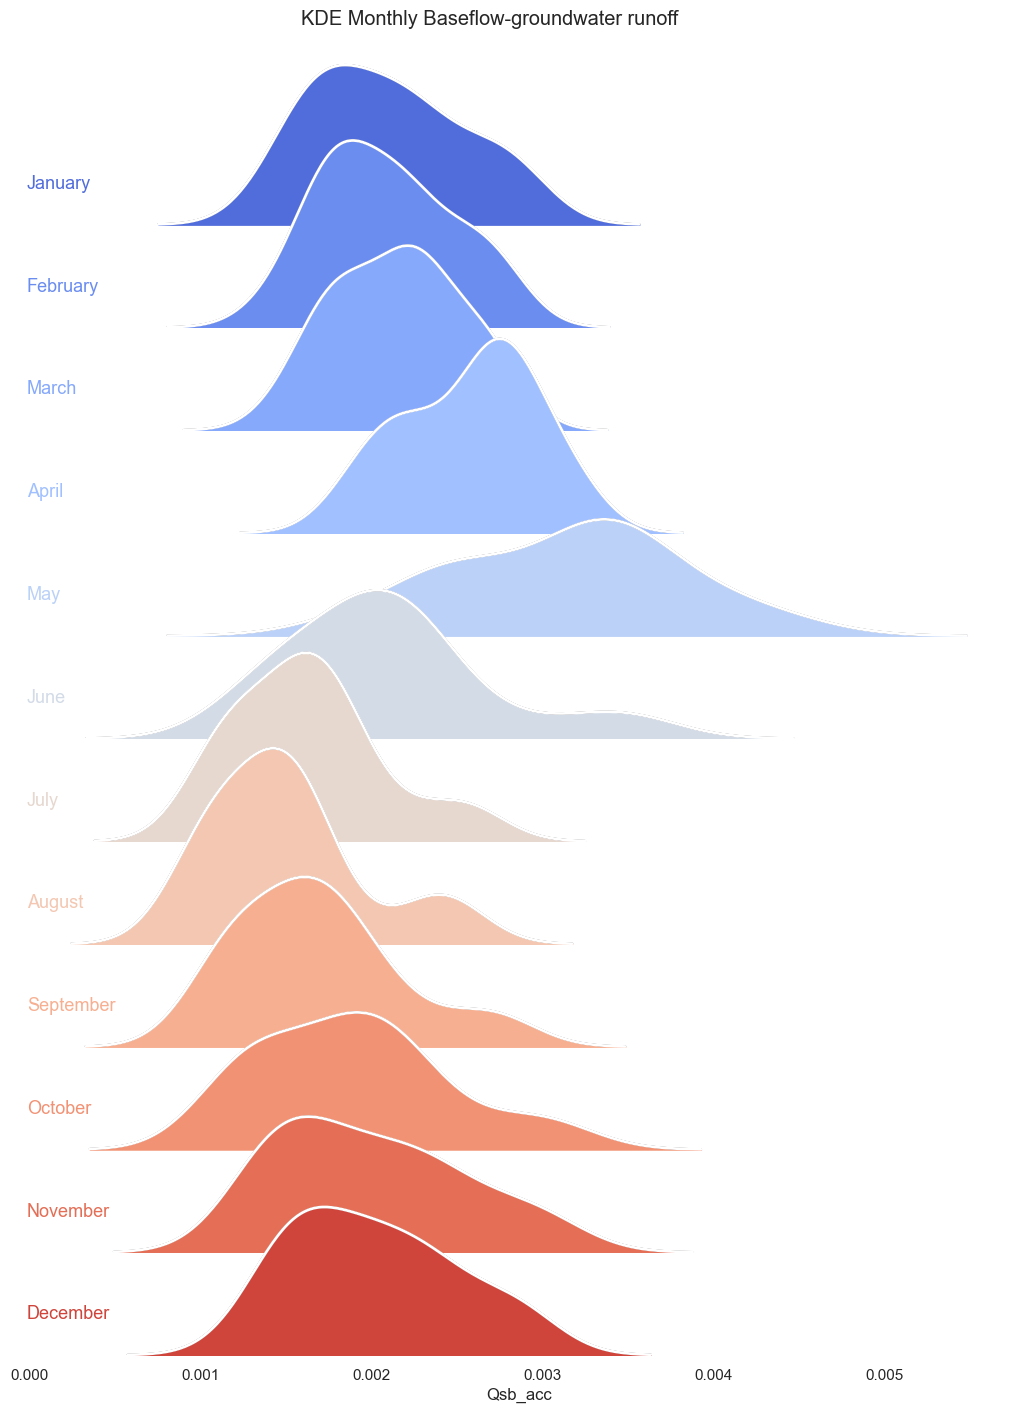

In [ ]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette('coolwarm', 12)
g = sns.FacetGrid(y, palette=palette, row="month", hue="month", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="Qsb_acc", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Qsb_acc", color='black')
g.map(sns.kdeplot, 'Qsb_acc', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)
def label(x, color, label):
    ax = plt.gca()
    # Convert the numeric value to month name
    month_name = calendar.month_name[int(label)]
    ax.text(0, .2, month_name, color=color, fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "month")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Qsb_acc",ylabel='')
plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
g.despine(bottom=True,left=True)
g.fig.suptitle('KDE Monthly Baseflow-groundwater runoff', y=0.98)

The kernel density estimation (KDE) plot is used to display the distribution of "Qsb_acc" values for each month.  The KDE plot shows the probability density of the variable on the y-axis.  

**Plot 2**  Correlation analysis of Soil Temperature (°C) in 10cm depth and Soil Moisture (mm)

In [ ]:
sns.set(color_codes=True)

In [ ]:
cords = ds[['Snowf_tavg',   #Snow precipitation rate       
            'Rainf_f_tavg', #Total precipitation rate           
            'Evap_tavg',    #Evapotranspiration
            'SoilTMP0_10cm_inst', #Soil temperature
            'SoilMoist_S_inst',   #Surface Soil moisture
            'TVeg_tavg'      #Transpiration
            ]]
cords_df = cords.to_dataframe()


In [ ]:
cords_df = cords_df.dropna()
cords_df = cords_df.groupby('time').mean()

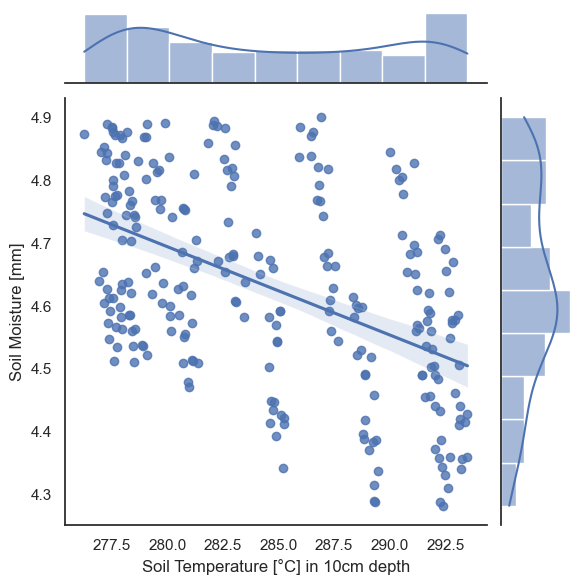

In [ ]:
sns.set(style='white',palette='deep',color_codes=True)
sns.jointplot(x='SoilTMP0_10cm_inst', y='SoilMoist_S_inst', data=cords_df, kind='reg')
plt.xlabel('Soil Temperature [°C] in 10cm depth')
plt.ylabel('Soil Moisture [mm]')
plt.show()

**Plot 3** Correlation analysis of 6 variables  
*Snowf_tavg* : **Snow precipitation rate**       
*Rainf_f_tavg* : **Total precipitation rate**               
*Evap_tavg* : **Evapotranspiration**  
*SoilTMP0_10cm_inst* : **Soil temperature**  
*SoilMoist_S_inst* : **Surface Soil moisture**  
*TVeg_tavg* : **Transpiration**  


In [ ]:
new_column_names = {'Snowf_tavg': 'SnowPrecipitated rate', 'Rainf_f_tavg': 'Total precipitation rate', 'Evap_tavg': 'Evapotranspiration', 'SoilTMP0_10cm_inst': 'Soil temperature', 'SoilMoist_S_inst': 'Surface Soil moistur', 'TVeg_tavg': 'Transpiration'}

# 使用rename()函数更改列名
cords_df = cords_df.rename(columns=new_column_names)

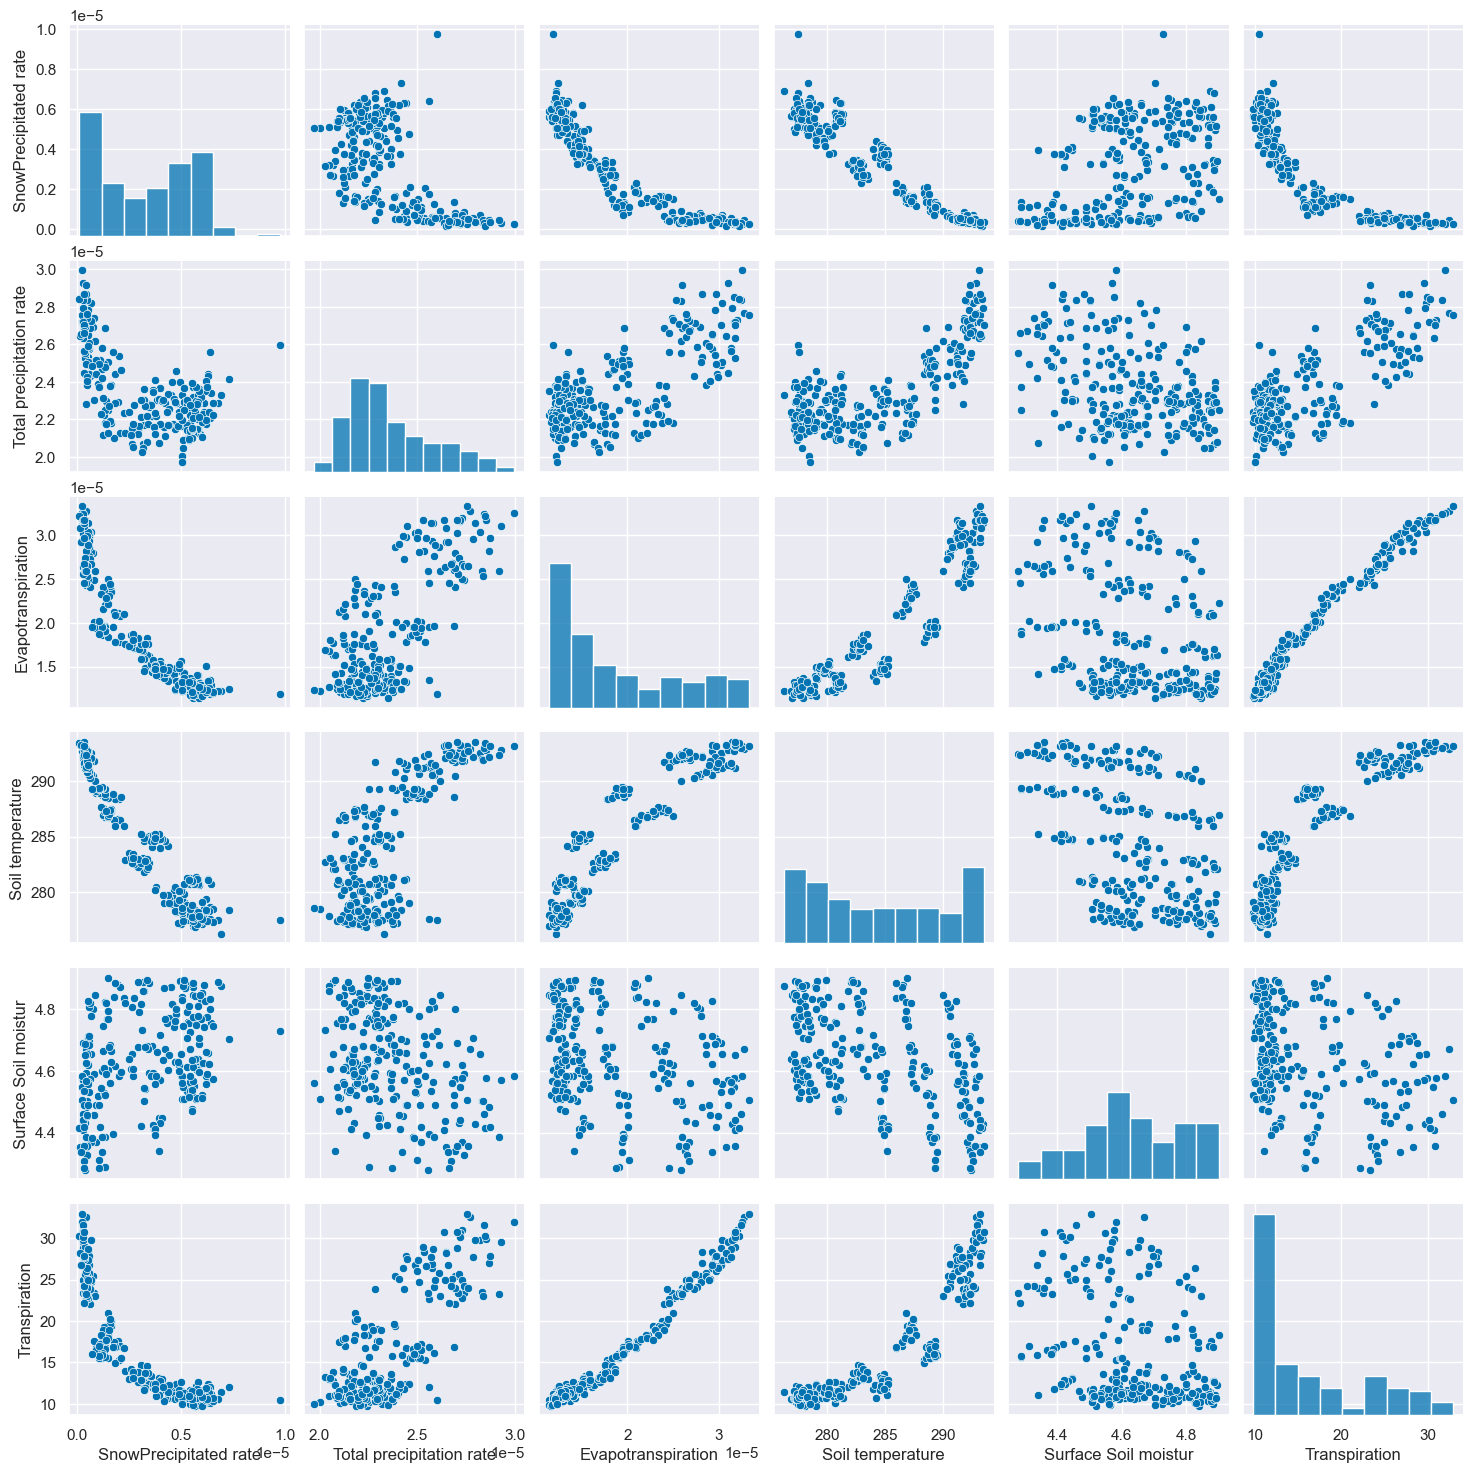

In [ ]:
sns.set(style='darkgrid',palette='colorblind',color_codes=True)
sns.pairplot(cords_df)

We can observe the relationship between the variables.  

**Plot 4**  Autocorrelation and Partial Autocorrelation

This plot is autocorrelation and partial autocorrelation of Total precipitation rate.

I got help in the website that https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#35.-Time-Series-Plot

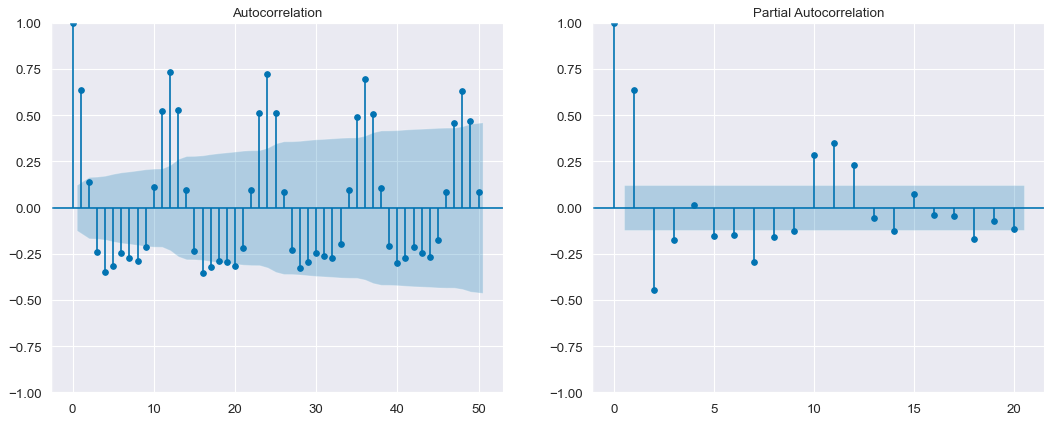

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Import Data
df = cords_df['Total precipitation rate'].copy()

# Draw Plot
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df, ax=ax1, lags=50)
plot_pacf(df, ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

**Plot 5** 
Time series decomposition   
I got help in the website that https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#35.-Time-Series-Plot.

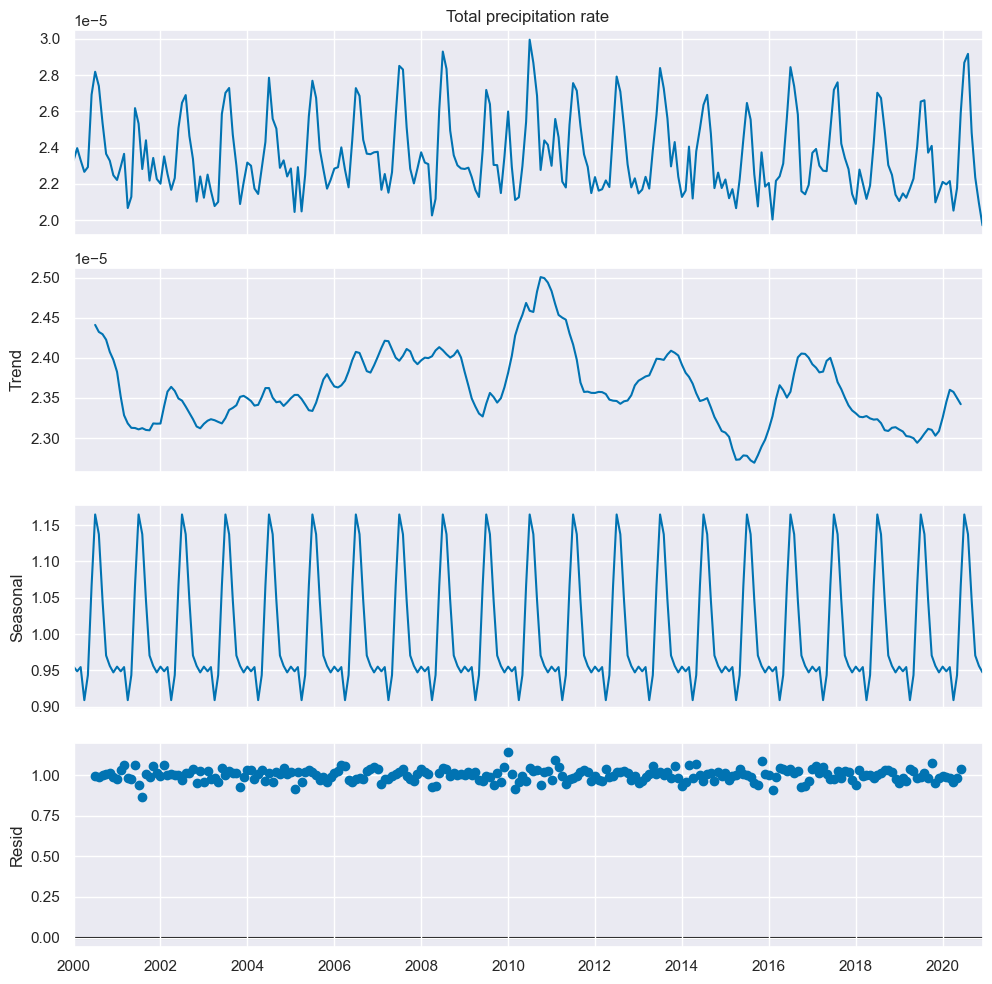

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df2 = cords_df['Total precipitation rate'].copy()

# Decompose 
result = seasonal_decompose(df2, model='multiplicative')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('')
plt.show()

**Plot 6**   
Hvplot of snow depth water equivalent

In [ ]:
import hvplot.xarray
import xarray as xr

In [ ]:
#Snow depth water equivalent
sdwe = ds.SWE_inst

In [ ]:
#这个图像只能在ipynb中运行后显示！！！
sdwe.hvplot.quadmesh(x='lon', y='lat', geo=True, widget_location='bottom', rasterize=True, project=True)

BokehModel(combine_events=True, render_bundle={'docs_json': {'88f6ae04-ee89-487d-bc3e-12f4201e4aba': {'version…

Task exception was never retrieved
future: <Task finished name='Task-7' coro=<Callback.process_on_change() done, defined at d:\Program\Anaconda\envs\Env\Lib\site-packages\holoviews\plotting\bokeh\callbacks.py:355> exception=UnsetValueError("figure(id='p1019', ...).inner_height doesn't have a value set")>
Traceback (most recent call last):
  File "d:\Program\Anaconda\envs\Env\Lib\site-packages\holoviews\plotting\bokeh\callbacks.py", line 374, in process_on_change
    msg[attr] = self.resolve_attr_spec(path, cb_obj)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Program\Anaconda\envs\Env\Lib\site-packages\holoviews\plotting\bokeh\callbacks.py", line 281, in resolve_attr_spec
    resolved = getattr(resolved, p, None)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Program\Anaconda\envs\Env\Lib\site-packages\bokeh\core\property\descriptors.py", line 283, in __get__
    raise UnsetValueError(f"{obj}.{self.name} doesn't have a value set")
bokeh.core.property.descriptors

**Plot 7**   
Beautify plot in 3.1

C:\Users\Pizhu_Huang\AppData\Local\Temp\ipykernel_18064\3268063479.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='date',y='Qsb_acc',data=gs,palette = "coolwarm")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


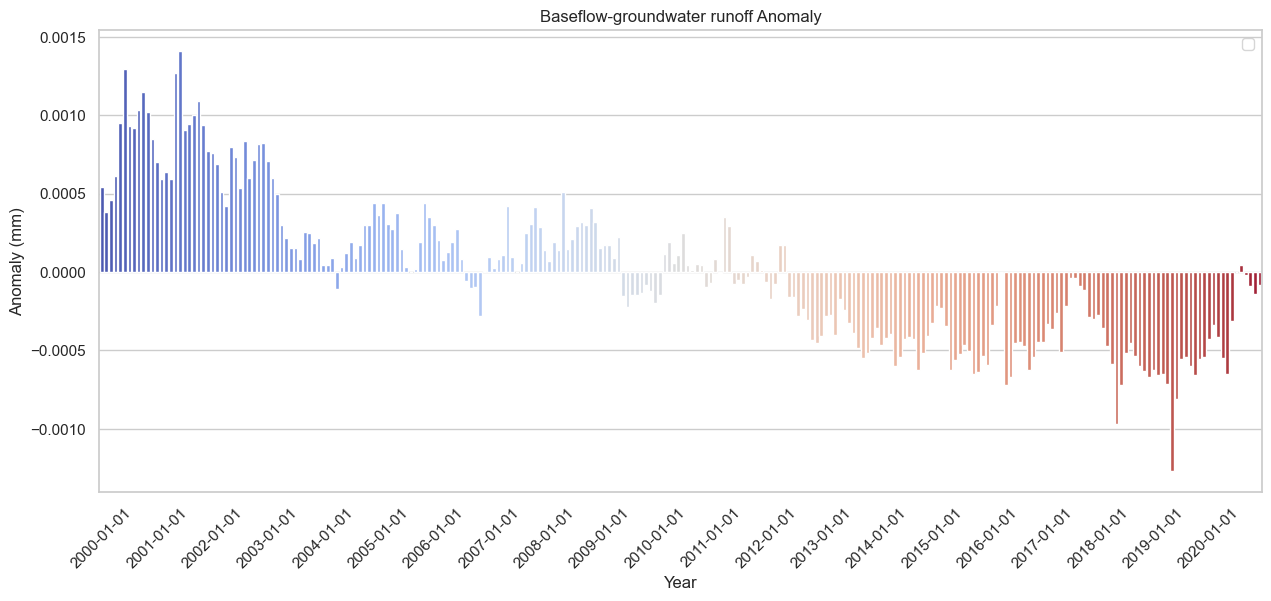

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")
gs = dq_reav.copy().to_dataframe()
gs["date"] = gs.index
plt.figure(figsize=(15, 6))
sns.barplot(x='date',y='Qsb_acc',data=gs,palette = "coolwarm")
plt.xticks(ticks = np.arange(0, 252, 12),rotation=45)
plt.xlabel('Year')
plt.ylabel('Anomaly (mm)')
plt.title('Baseflow-groundwater runoff Anomaly')
plt.legend()
plt.show()

### 3.1 满足题目要求。
### 3.2 满足题目要求。
### 得分：11/10

### =============================